# Japan Climate and Its Energy

The objective of this project is to gain insights of Japan climate and its energy, discover Japan climate trends and understand Japan energy market. The project contains two dataset, one for climate and one for energy. The two datasets will be joined in the end to seek the insights on how the weather is related to consumption. The time period we will explore is between 2000 to 2020.

There are questions that can be asked for each dataset and also together:
1. __Climate:__
* What are the trends of Japan climate?
* If there are major trends what would likely be the causes?
2. __Energy:__
* What are the sources of electricity?
* Which source has been generated the most?
* What are the trends of each source, what cause each one to decrease or increase?
* What is the amount of clean & fossil energy generated and which one is higher?
* How much emissions clean & fossil energy produced relative to them being generated?
* Is capacity enough for demand?
* Is there a positive relationship between emissions, demand, and capacity? 
3. __Climate & Energy:__
* Are there any correlation between climate and energy?
* What is the relationship between climate and energy?

At the end of this notebook will be a summary of what are found, what are the problems, and what are the possible solutions.


## Import Libraries and Datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
 
%matplotlib inline
    
from matplotlib import style
style.use('bmh')

In [2]:
# Climate data
climate = pd.read_csv('dataset\jp_climate.csv')

# Energy data
energy = pd.read_csv('dataset\global_energy.csv')

## Climate Dataset Cleaning

### Dataset Overview

In [3]:
climate.head()

,Date,Average daily minimum temperature,Average daily maximum temperature,Average temperature,Total precipitation,Maximum daily precipitation,Sunlight hours,Total snowfall,Average wind speed,Average humidity,Average cloud cover
0,1959/12,2.7,12.3,7.0,176.3,51.2,159.9,0,3.1,64,4.8
1,1960/1,0.0,10.6,5.0,31.2,24.8,208.9,0,3.5,51,3.4
2,1960/2,1.6,12.7,6.6,8.8,4.4,207.3,0,3.6,54,4.2
3,1960/3,5.1,14.6,9.5,71.2,19.7,209.0,0,4.7,55,6.0
4,1960/4,8.9,17.2,12.8,164.8,40.1,154.6,0,4.4,63,7.0


There are 745 rows and 11 columns.

In [4]:
climate.shape

(745, 11)

Most of the columns are float and int except the date.

In [5]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745 entries, 0 to 744
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               745 non-null    object 
 1   Average daily minimum temperature  745 non-null    float64
 2   Average daily maximum temperature  745 non-null    float64
 3   Average temperature                745 non-null    float64
 4   Total precipitation                745 non-null    float64
 5   Maximum daily precipitation        745 non-null    float64
 6   Sunlight hours                     745 non-null    float64
 7   Total snowfall                     745 non-null    int64  
 8   Average wind speed                 745 non-null    float64
 9   Average humidity                   745 non-null    int64  
 10  Average cloud cover                745 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 64.1+ KB


In [6]:
climate.describe()

,Average daily minimum temperature,Average daily maximum temperature,Average temperature,Total precipitation,Maximum daily precipitation,Sunlight hours,Total snowfall,Average wind speed,Average humidity,Average cloud cover
count,745.000000,745.000000,745.000000,745.000000,745.000000,745.00000,745.000000,745.000000,745.000000,745.000000
mean,12.548725,19.976913,16.034631,125.642819,45.752752,162.93557,0.934228,3.283356,63.330201,6.468725
std,7.835419,7.307781,7.473092,92.391390,35.774987,39.15383,4.725215,0.483426,10.038687,1.559898
min,-2.600000,6.300000,3.000000,0.000000,0.000000,39.20000,0.000000,2.100000,36.000000,1.900000
25%,5.100000,12.800000,8.700000,58.000000,22.500000,137.00000,0.000000,3.000000,56.000000,5.400000
50%,12.600000,20.300000,16.300000,109.300000,37.000000,162.70000,0.000000,3.300000,64.000000,6.600000
75%,19.800000,26.300000,22.800000,166.900000,58.000000,191.50000,0.000000,3.600000,72.000000,7.700000
max,27.000000,34.100000,29.600000,780.000000,259.500000,270.50000,57.000000,4.900000,89.000000,9.700000


There are no null values.

In [7]:
climate.isna().sum()

Date                                 0
Average daily minimum temperature    0
Average daily maximum temperature    0
Average temperature                  0
Total precipitation                  0
Maximum daily precipitation          0
Sunlight hours                       0
Total snowfall                       0
Average wind speed                   0
Average humidity                     0
Average cloud cover                  0
dtype: int64

Formatting the date and take only the year. Put the year to the first column.

In [8]:
# Get each part of date
climate['Date'] = pd.to_datetime(climate['Date'], format='%Y/%m')
climate['Month'] = pd.DatetimeIndex(climate['Date']).month
climate['Year'] = pd.DatetimeIndex(climate['Date']).year

climate = climate.drop('Date', axis=1)
climate = climate.drop('Month', axis=1)

first_column = climate.pop('Year')
climate.insert(0, 'Year', first_column)

There is a blank space in the end of the 'Sunlight hours ' column name. So, it must be removed.

In [9]:
climate = climate.rename(columns = {'Sunlight hours ': 'Sunlight hours'})

Get only the year 2000 and above.

In [10]:
climate1 = climate.loc[climate['Year'] >=  2000].copy()

In [11]:
climate1.head()

,Year,Average daily minimum temperature,Average daily maximum temperature,Average temperature,Total precipitation,Maximum daily precipitation,Sunlight hours,Total snowfall,Average wind speed,Average humidity,Average cloud cover
481,2000,4.2,11.2,7.6,66.5,19.0,153.8,0,3.2,51,6.0
482,2000,2.4,9.9,6.0,4.0,2.5,207.7,0,3.7,38,4.2
483,2000,5.2,13.5,9.4,85.5,29.0,207.9,0,3.7,44,4.7
484,2000,10.7,18.7,14.5,151.5,32.5,174.9,0,3.6,55,6.7
485,2000,16.5,24.0,19.8,109.0,30.5,184.0,0,3.1,68,7.4


Combining multiple rows with the same year into a single row.

In [12]:
# Set aggregate functions
agg_functions = {'Average daily minimum temperature': 'mean',
                'Average daily maximum temperature': 'mean',
                'Average temperature': 'mean',
                'Total precipitation': 'sum',
                'Maximum daily precipitation': 'max',
                 'Sunlight hours': 'sum',
                'Total snowfall': 'sum',
                'Average wind speed': 'mean',
                'Average humidity': 'mean',
                'Average cloud cover': 'mean'}

# Do aggregate
climate1 = climate1.groupby(climate1['Year']).aggregate(agg_functions)

In [13]:
climate1.head()

,Average daily minimum temperature,Average daily maximum temperature,Average temperature,Total precipitation,Maximum daily precipitation,Sunlight hours,Total snowfall,Average wind speed,Average humidity,Average cloud cover
Year,,,,,,,,,,
2000,13.583333,20.625000,16.858333,1603.0,115.0,1962.5,0,3.225000,59.500000,6.441667
2001,13.108333,20.358333,16.491667,1491.0,186.0,1976.5,12,3.208333,58.833333,6.233333
2002,13.358333,20.500000,16.708333,1294.5,107.5,1990.0,3,3.191667,58.916667,6.458333
2003,12.791667,19.641667,16.008333,1854.0,151.0,1723.2,0,3.141667,61.000000,6.950000
2004,13.883333,21.283333,17.341667,1750.0,222.5,2132.7,3,3.666667,58.166667,6.283333


## Energy Dataset Cleaning

### Dataset Overview

In [14]:
energy.head()

,Area,Country code,Year,Area type,Continent,Ember region,EU,OECD,G20,G7,Category,Subcategory,Variable,Unit,Value,YoY absolute change,YoY % change
0,Afghanistan,AFG,2000,Country,Asia,Asia,0.0,0.0,0.0,0.0,Capacity,Aggregate fuel,Clean,GW,0.19,NaN,NaN
1,Afghanistan,AFG,2000,Country,Asia,Asia,0.0,0.0,0.0,0.0,Capacity,Aggregate fuel,Fossil,GW,0.03,NaN,NaN
2,Afghanistan,AFG,2000,Country,Asia,Asia,0.0,0.0,0.0,0.0,Capacity,Aggregate fuel,Gas and Other Fossil,GW,0.03,NaN,NaN
3,Afghanistan,AFG,2000,Country,Asia,Asia,0.0,0.0,0.0,0.0,Capacity,Aggregate fuel,"Hydro, Bioenergy and Other Renewables",GW,0.19,NaN,NaN
4,Afghanistan,AFG,2000,Country,Asia,Asia,0.0,0.0,0.0,0.0,Capacity,Aggregate fuel,Renewables,GW,0.19,NaN,NaN


There are 323,530 rows and 17 columns.

In [15]:
energy.shape

(323530, 17)

There is a mix of object and numerical type.

In [16]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323530 entries, 0 to 323529
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Area                 323530 non-null  object 
 1   Country code         307558 non-null  object 
 2   Year                 323530 non-null  int64  
 3   Area type            323530 non-null  object 
 4   Continent            307558 non-null  object 
 5   Ember region         307558 non-null  object 
 6   EU                   307558 non-null  float64
 7   OECD                 307558 non-null  float64
 8   G20                  307558 non-null  float64
 9   G7                   307558 non-null  float64
 10  Category             323530 non-null  object 
 11  Subcategory          323530 non-null  object 
 12  Variable             323530 non-null  object 
 13  Unit                 323530 non-null  object 
 14  Value                302935 non-null  float64
 15  YoY absolute chan

In [17]:
energy.describe()

,Year,EU,OECD,G20,G7,Value,YoY absolute change,YoY % change
count,323530.000000,307558.000000,307558.000000,307558.000000,307558.000000,302935.000000,219755.000000,140343.000000
mean,2010.500269,0.127469,0.178613,0.087983,0.033047,62.769045,1.745226,9.555724
std,6.335330,0.333498,0.383029,0.283271,0.178761,544.896337,25.738595,162.846549
min,2000.000000,0.000000,0.000000,0.000000,0.000000,-77.030000,-611.460000,-51275.000000
25%,2005.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2010.000000,0.000000,0.000000,0.000000,0.000000,0.160000,0.000000,0.780000
75%,2016.000000,0.000000,0.000000,0.000000,0.000000,7.140000,0.040000,8.750000
max,2021.000000,1.000000,1.000000,1.000000,1.000000,27782.790000,1527.150000,10500.000000


There are null values in the 'Value' columns that we will be using.

In [18]:
energy.isna().sum()

Area                        0
Country code            15972
Year                        0
Area type                   0
Continent               15972
Ember region            15972
EU                      15972
OECD                    15972
G20                     15972
G7                      15972
Category                    0
Subcategory                 0
Variable                    0
Unit                        0
Value                   20595
YoY absolute change    103775
YoY % change           183187
dtype: int64

Since the 'Value' column contains many different unit of measurements we can't fill those null with mean or median. So I decided to take only non-null values.

In [19]:
# energy['Value'].fillna(value=energy['Value'].mean(), inplace=True) # Cannot be used be cause of different units of measurements

energy1 = energy[energy['Value'].notna()]

In [20]:
energy1.isna().sum()

Area                        0
Country code            15708
Year                        0
Area type                   0
Continent               15708
Ember region            15708
EU                      15708
OECD                    15708
G20                     15708
G7                      15708
Category                    0
Subcategory                 0
Variable                    0
Unit                        0
Value                       0
YoY absolute change     83180
YoY % change           162592
dtype: int64

Rename 'Area' to 'Country' and select certain columns and get only the rows that are in Japan.

In [21]:
energy1 = energy1.rename(columns = {'Area': 'Country'})

energy1 = energy1[energy1['Country'] == 'Japan']

energy1 = energy1.filter(['Area', 'Year', 'Category', 'Subcategory', 'Variable', 'Unit', 'Value'])

energy1 = energy1.loc[energy1['Year'] <  2021].copy()

In [22]:
energy1.head()

,Year,Category,Subcategory,Variable,Unit,Value
147720,2000,Capacity,Aggregate fuel,Clean,GW,69.18
147721,2000,Capacity,Aggregate fuel,Fossil,GW,122.77
147722,2000,Capacity,Aggregate fuel,Gas and Other Fossil,GW,90.96
147723,2000,Capacity,Aggregate fuel,"Hydro, Bioenergy and Other Renewables",GW,23.52
147724,2000,Capacity,Aggregate fuel,Renewables,GW,23.93


# Exploration
__*Note: Graph descriptions and insights will be below each graph__

## Let's take a look at Japan climate

In [23]:
climate1.head()

,Average daily minimum temperature,Average daily maximum temperature,Average temperature,Total precipitation,Maximum daily precipitation,Sunlight hours,Total snowfall,Average wind speed,Average humidity,Average cloud cover
Year,,,,,,,,,,
2000,13.583333,20.625000,16.858333,1603.0,115.0,1962.5,0,3.225000,59.500000,6.441667
2001,13.108333,20.358333,16.491667,1491.0,186.0,1976.5,12,3.208333,58.833333,6.233333
2002,13.358333,20.500000,16.708333,1294.5,107.5,1990.0,3,3.191667,58.916667,6.458333
2003,12.791667,19.641667,16.008333,1854.0,151.0,1723.2,0,3.141667,61.000000,6.950000
2004,13.883333,21.283333,17.341667,1750.0,222.5,2132.7,3,3.666667,58.166667,6.283333


In [24]:
climate1.describe()

,Average daily minimum temperature,Average daily maximum temperature,Average temperature,Total precipitation,Maximum daily precipitation,Sunlight hours,Total snowfall,Average wind speed,Average humidity,Average cloud cover
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,13.136742,20.552652,16.566667,1650.409091,134.500000,1960.713636,6.272727,3.046970,62.768939,6.656818
std,0.424222,0.470979,0.345760,196.574876,40.655931,138.430805,11.119189,0.256445,4.734619,0.267492
min,12.075000,19.641667,15.808333,1294.500000,58.000000,1587.800000,0.000000,2.708333,57.416667,6.233333
25%,12.795833,20.225000,16.400000,1484.250000,108.500000,1894.375000,0.000000,2.864583,59.062500,6.435417
50%,13.129167,20.566667,16.512500,1646.750000,129.500000,1981.750000,3.000000,2.941667,60.875000,6.716667
75%,13.502083,20.885417,16.770833,1796.500000,153.625000,2054.875000,6.000000,3.204167,68.000000,6.837500
max,13.883333,21.341667,17.341667,2052.500000,222.500000,2132.700000,49.000000,3.666667,71.416667,7.116667


Declare variables for each column for easy access.

In [25]:
# Variables for each column
avg_temp = climate1['Average temperature']
min_avg_temp = climate1['Average daily minimum temperature']
max_avg_temp = climate1['Average daily maximum temperature']
total_pcp = climate1['Total precipitation']
max_daily_pcp = climate1['Maximum daily precipitation']
sun_hours = climate1['Sunlight hours']
total_snow = climate1['Total snowfall']
avg_wind_sp = climate1['Average wind speed']
avg_humid = climate1['Average humidity']
avg_cloud = climate1['Average cloud cover']

### Climate in Japan from 2000 to 2020

<Figure size 864x864 with 0 Axes>

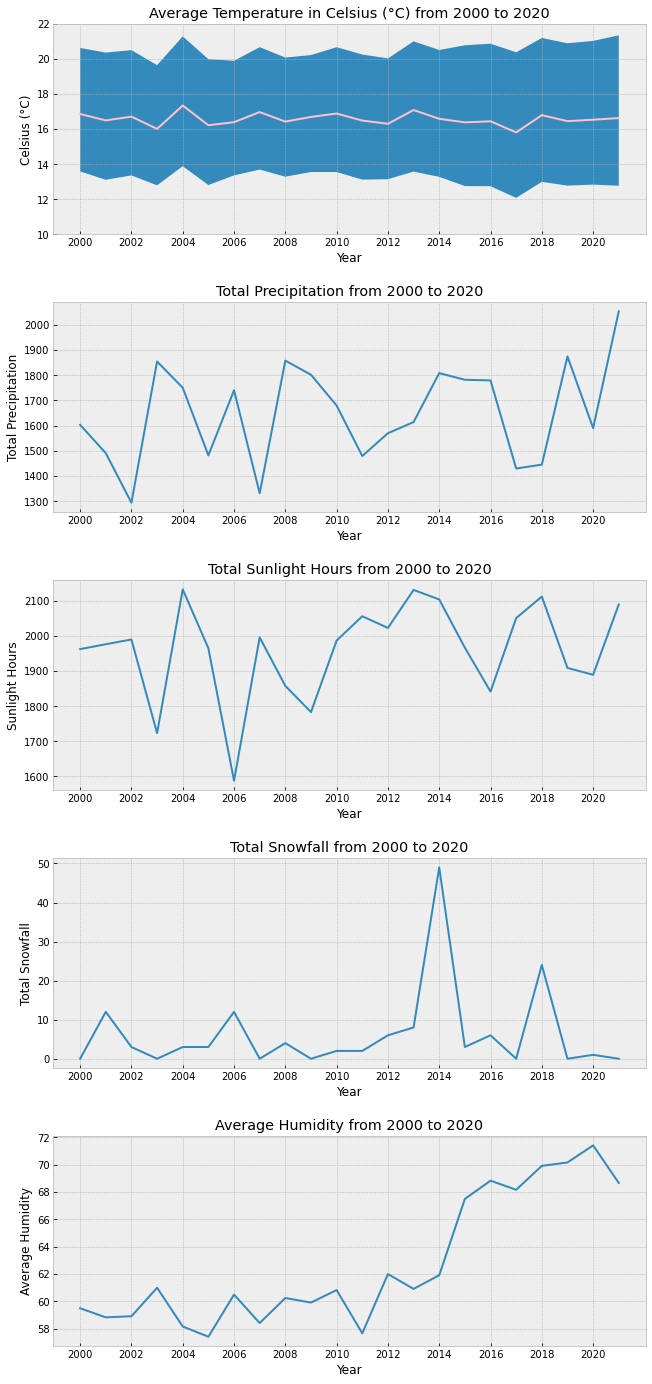

In [51]:
plt.figure(figsize=(12, 12))
fig, ax = plt.subplots(5)
fig.set_figheight(20)
fig.set_figwidth(10)
fig.tight_layout(pad=5.0)

#Average temperature
ax[0].plot(avg_temp, color='pink')
ax[0].fill_between(climate1.index, min_avg_temp, max_avg_temp)
ax[0].set_xticks(range(2000, 2022, 2))
ax[0].set_yticks(range(10, 24, 2))
ax[0].title.set_text('Average Temperature in Celsius (°C) from 2000 to 2020')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Celsius (°C)')

#Precipitation
ax[1].plot(total_pcp)
ax[1].set_xticks(range(2000, 2022, 2))
ax[1].title.set_text('Total Precipitation from 2000 to 2020')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Total Precipitation')

#Sunlight hours
ax[2].plot(sun_hours)
ax[2].set_xticks(range(2000, 2022, 2))
ax[2].title.set_text('Total Sunlight Hours from 2000 to 2020')
ax[2].set_xlabel('Year')
ax[2].set_ylabel('Sunlight Hours')

#Snow
ax[3].plot(total_snow)
ax[3].set_xticks(range(2000, 2022, 2))
ax[3].title.set_text('Total Snowfall from 2000 to 2020')
ax[3].set_xlabel('Year')
ax[3].set_ylabel('Total Snowfall')

#Humidity
ax[4].plot(avg_humid)
ax[4].set_xticks(range(2000, 2022, 2))
ax[4].title.set_text('Average Humidity from 2000 to 2020')
ax[4].set_xlabel('Year')
ax[4].set_ylabel('Average Humidity')

plt.show()

### What are the trends of Japan climate?

__Average temperature__\
The average temperature remains consistent from 2000 to 2020 with some fluctuations. However, the range has gradually increased since 2000. The minimum is getting lower and the maximum is getting higher. Thus, temperature in Japan is getting more extreme.

__Total precipitation__\
The total amount of rain per year in Japan has an increasing trend.

__Sunlight hours__\
Since 2009 the sunlight hours never reached the low point of 2009.

__Total snowfall__\
In 2014, Japan had encountered with a heavy snow storm. Other than that and another snow storm in 2018, nothing has change much.

__Average humidity__\
Surprisingly since 2014 the average humidity has been rising ever since. This can be due to urban warming but mainly we can point directly at global warming.

-------

## Now let's take a look at energy

In [27]:
energy1.head()

,Year,Category,Subcategory,Variable,Unit,Value
147720,2000,Capacity,Aggregate fuel,Clean,GW,69.18
147721,2000,Capacity,Aggregate fuel,Fossil,GW,122.77
147722,2000,Capacity,Aggregate fuel,Gas and Other Fossil,GW,90.96
147723,2000,Capacity,Aggregate fuel,"Hydro, Bioenergy and Other Renewables",GW,23.52
147724,2000,Capacity,Aggregate fuel,Renewables,GW,23.93


See what each column contains.

In [28]:
print('Category')
print('--------')
print(energy1.Category.value_counts())
print('')
print('Subcategory')
print('--------')
print(energy1.Subcategory.value_counts())
print('')
print('Variable')
print('--------')
print(energy1.Variable.value_counts())

Category
--------
Electricity generation    651
Power sector emissions    357
Capacity                  315
Electricity demand         42
Electricity imports        21
Name: Category, dtype: int64

Subcategory
--------
Fuel                   756
Aggregate fuel         504
Total                   42
Demand                  21
Demand per capita       21
Electricity imports     21
CO2 intensity           21
Name: Subcategory, dtype: int64

Variable
--------
Clean                                    84
Gas                                      84
Wind                                     84
Solar                                    84
Other Renewables                         84
Other Fossil                             84
Fossil                                   84
Hydro                                    84
Nuclear                                  84
Coal                                     84
Bioenergy                                84
Wind and Solar                           84
Renewables   

Declare variables for easy access.

In [29]:
# Variables for selected columns
year = energy1['Year']
cat = energy1['Category']
sub_cat = energy1['Subcategory']
varb = energy1['Variable']
unit = energy1['Unit']
value = energy1['Value']

Get percentage of power generation of selected source.

In [30]:
gen_power_pct = energy1[(cat == 'Electricity generation') & (sub_cat == 'Fuel') & (unit == '%') &
                       ((varb == 'Bionergy') |
                        (varb == 'Coal') |
                        (varb == 'Gas') |
                        (varb == 'Hydro') |
                        (varb == 'Nuclear') |
                        (varb == 'Solar') |
                        (varb == 'Wind'))]

total_power_gen = gen_power_pct.groupby(varb)['Value'].mean().sort_values(ascending=False)

### Source of Power Generated from 2000 to 2020

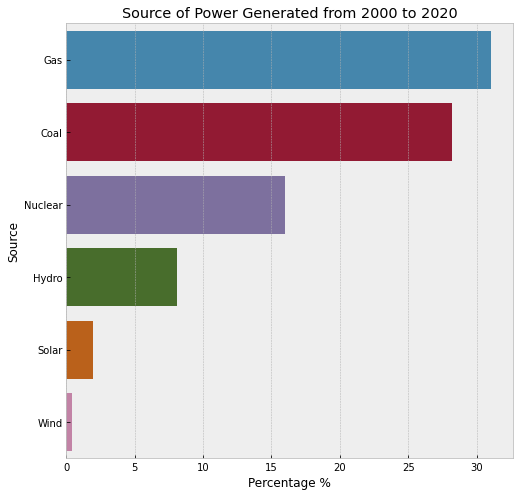

In [31]:
plt.figure(figsize=(8, 8))
plt.title('Source of Power Generated from 2000 to 2020')

ax = sns.barplot(x=total_power_gen, y=total_power_gen.index)
ax.set(xlabel='Percentage %', ylabel='Source')

plt.show()

### Gas and coal are used more than half of all Japan's energy sources
Japan has a domestic reserve of coal, however, coal alone is not enough. Gas is imported to accommodate energy demand. While others that are clean energy are very minor.

------

Declare variables for easy access.

In [32]:
bioenergy = energy1[(cat == 'Electricity generation') & (sub_cat == 'Fuel') & (unit == '%') & (varb == 'Bioenergy')]
coal = energy1[(cat == 'Electricity generation') & (sub_cat == 'Fuel') & (unit == '%') & (varb == 'Coal')]
gas = energy1[(cat == 'Electricity generation') & (sub_cat == 'Fuel') & (unit == '%') & (varb == 'Gas')]
hydro = energy1[(cat == 'Electricity generation') & (sub_cat == 'Fuel') & (unit == '%') & (varb == 'Hydro')]
nuclear = energy1[(cat == 'Electricity generation') & (sub_cat == 'Fuel') & (unit == '%') & (varb == 'Nuclear')]
solar = energy1[(cat == 'Electricity generation') & (sub_cat == 'Fuel') & (unit == '%') & (varb == 'Solar')]

### Trend of Power Generated from Each Source from 2000 to 2020

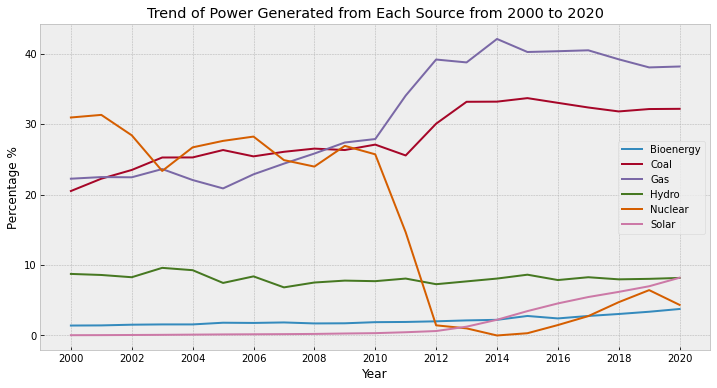

In [33]:
plt.figure(figsize=(12, 6))
plt.xlabel("Year")
plt.ylabel("Percentage %")
plt.title("Trend of Power Generated from Each Source from 2000 to 2020")
plt.xticks(np.arange(2000, 2022, 2.0))

sns.lineplot(x=bioenergy['Year'], y=bioenergy['Value'], label="Bioenergy")
sns.lineplot(x=coal['Year'], y=coal['Value'], label="Coal")
sns.lineplot(x=gas['Year'], y=gas['Value'], label="Gas")
sns.lineplot(x=hydro['Year'], y=hydro['Value'], label="Hydro")
sns.lineplot(x=nuclear['Year'], y=nuclear['Value'], label="Nuclear")
sns.lineplot(x=solar['Year'], y=solar['Value'], label="Solar")

plt.show()

### There are vital changes of energy sources throughout 2000 to 2020
At around or prior to 2000 Japan had been relying on nuclear energy source alongside coal and gas. However, since 2011 nuclear power plant incident, nuclear plants are shutdown, thus, it's plummet and is even stay below solar for roughly eight years.

Since the incident, Japan had to increase coal and gas to accommodate the loss of nuclear power. Therefore, nuclear source went the opposite direction of coal and gas. By increasing coal and gas, there are higher emssions as well.

While the other three sources of clean energy haven't changed much since 2000. However, solar has an increasing trend since 2012 due to its increasing popularity.

-------

Variables for each selected columns with conditions

In [34]:
#Generation
clean_energy_gen = energy1[(cat == 'Electricity generation') & (sub_cat == 'Aggregate fuel') & (varb == 'Clean') & (unit == 'TWh')]
fossil_energy_gen = energy1[(cat == 'Electricity generation') & (sub_cat == 'Aggregate fuel') & (varb == 'Fossil') & (unit == 'TWh')]

#----------------------------------------------------------------

#Emissions
clean_emission = energy1[(cat == 'Power sector emissions') & (sub_cat == 'Aggregate fuel') & (varb == 'Clean') & (unit == 'mtCO2')]
fossil_emission = energy1[(cat == 'Power sector emissions') & (sub_cat == 'Aggregate fuel') & (varb == 'Fossil') & (unit == 'mtCO2')]
total_emission = energy1[(cat == 'Power sector emissions') & (sub_cat == 'Total')]

#----------------------------------------------------------------

#Capacity
clean_capacity =  energy1[(cat == 'Capacity') & (sub_cat == 'Aggregate fuel') & (varb == 'Clean') & (unit == 'GW')]
fossil_capacity =  energy1[(cat == 'Capacity') & (sub_cat == 'Aggregate fuel') & (varb == 'Fossil') & (unit == 'GW')]

#Total Capacity
total_capacity = energy1[(cat == 'Capacity') & (sub_cat == 'Aggregate fuel') & ((varb == 'Fossil') | (varb == 'Clean')) & (unit == 'GW')]
#Combine clean & fossil
agg_functions = {'Value': 'sum'}
total_capacity = total_capacity.groupby(total_capacity['Year']).aggregate(agg_functions)

#----------------------------------------------------------------

# Demand (Also this is basically -> Aggregate Clean + Fossil Generation)
energy_demand =  energy1[(cat == 'Electricity demand') & (sub_cat == 'Demand') & (unit == 'TWh')]
#Change unit from TWh to GW
energy_demand_gw = energy_demand.copy()
energy_demand_gw['Value'] = (energy_demand['Value'] * 1000) / 8760

### Trend of Aggregate Clean & Fossil Energy Generated from 2000 to 2020

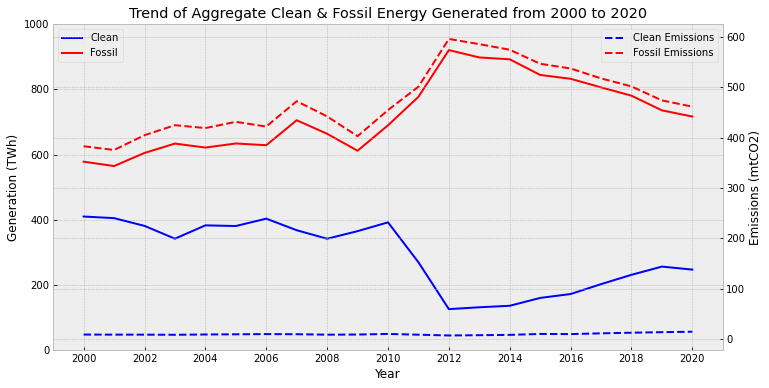

In [35]:
plt.figure(figsize=(12, 6))
plt.xlabel("Year")
plt.ylabel("Generation (TWh)")
plt.ylim(0, 1000)
plt.title("Trend of Aggregate Clean & Fossil Energy Generated from 2000 to 2020")
plt.xticks(np.arange(2000, 2022, 2.0))

sns.lineplot(x=clean_energy_gen['Year'], y=clean_energy_gen['Value'], label='Clean', color='blue').legend(loc='upper left')
sns.lineplot(x=fossil_energy_gen['Year'], y=fossil_energy_gen['Value'], label='Fossil', color='red').legend(loc='upper left')
ax2 = plt.twinx()
ax2.set_ylabel("Emissions (mtCO2)")
sns.lineplot(x=clean_emission['Year'], y=clean_emission['Value'], label='Clean Emissions', color='blue', linestyle='--', ax=ax2)
sns.lineplot(x=fossil_emission['Year'], y=fossil_emission['Value'], label='Fossil Emissions', color='red', linestyle='--', ax=ax2)

plt.show()

### Fossil energy has produced emissions according to its generation, while clean energy does not
From the graph fossil energy generation and fossil emissions have roughly the same shape, meaning it's produced emissions as it's produced power.
However, clean energy emissions are almost non-existence and are not relative to how much clean energy is produced.

You can also see that the trends go the opposite way since the 2011 incident.

-------

### Capacity of Clean & Fossil Energy from 2000 to 2020

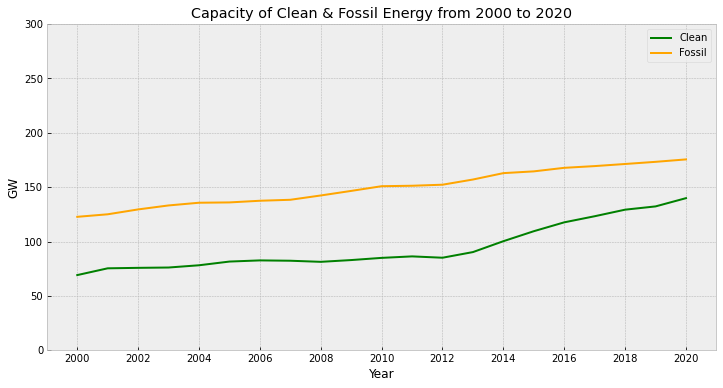

In [36]:
plt.figure(figsize=(12, 6))
plt.xlabel("Year")
plt.ylabel("GW")
plt.ylim(0, 300)
plt.title("Capacity of Clean & Fossil Energy from 2000 to 2020")
plt.xticks(np.arange(2000, 2022, 2.0))

sns.lineplot(x=clean_capacity['Year'], y=clean_capacity['Value'], label='Clean', color='green')
sns.lineplot(x=fossil_capacity['Year'], y=fossil_capacity['Value'], label='Fossil', color='orange')

plt.show()

### Fossil energy has higher capacity than clean energy, both had been rising since 2000
------

### Demand of Electricity from 2000 to 2020

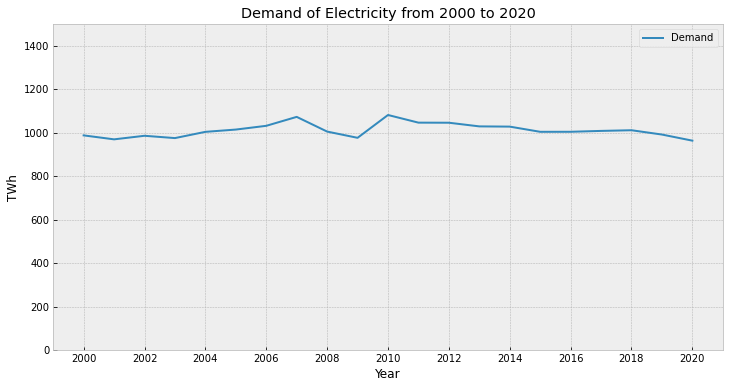

In [37]:
plt.figure(figsize=(12, 6))
plt.xlabel("Year")
plt.ylabel("TWh")
plt.ylim(0, 1500)
plt.title("Demand of Electricity from 2000 to 2020")
plt.xticks(np.arange(2000, 2022, 2.0))

sns.lineplot(x=energy_demand['Year'], y=energy_demand['Value'], label='Demand')

plt.show()

### Energy demand is roughly the same since 2000
------

### Comparison of Capacity & Demand from 2000 to 2020

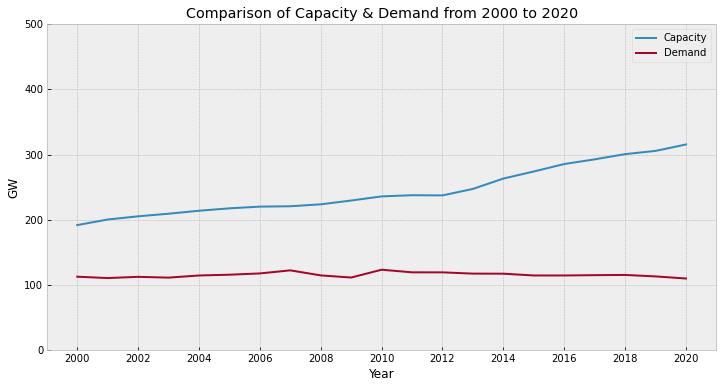

In [38]:
plt.figure(figsize=(12, 6))
plt.xlabel("Year")
plt.ylabel("GW")
plt.ylim(0, 500)
plt.title("Comparison of Capacity & Demand from 2000 to 2020")
plt.xticks(np.arange(2000, 2022, 2.0))

sns.lineplot(x=total_capacity.index, y=total_capacity['Value'], label='Capacity')
sns.lineplot(x=energy_demand_gw['Year'], y=energy_demand_gw['Value'], label='Demand')

plt.show()

### Japan has been increasing the capacity
While the demand is under capacity, which may leads to the conclusion that Japan has enough energy. The peak demand times are not being considered here as well as the fact that Japan cannot produce power 100% all the time.

What we can get from this graph is that, Japan has been increasing the capacity to tackle energy shortage.

-----

### Demand and Emissions Relationship

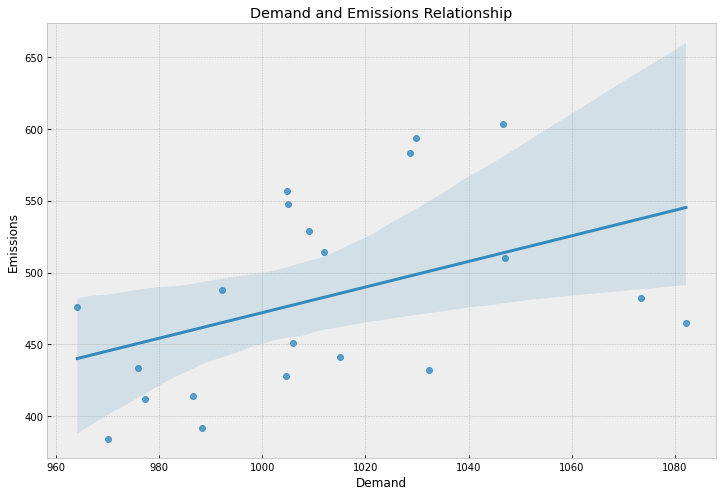

In [39]:
demand = pd.DataFrame({'Demand': energy_demand['Value']})
emission = pd.DataFrame({'Emissions': total_emission['Value']})

demand.reset_index(drop=True, inplace=True)
emission.reset_index(drop=True, inplace=True)

demand_emission = pd.concat([demand, emission], axis=1)

plt.figure(figsize=(12, 8))
plt.title("Demand and Emissions Relationship")

sns.regplot(x='Demand', y='Emissions', data=demand_emission)

plt.show()

### There is a positive relationship between demand and emissions
Higher demand leads to higher emissions as the energy generation increases according to demand. This is also due to Japan relies more on fossil energy sources.

-----

### Capacity and Emissions Relationship

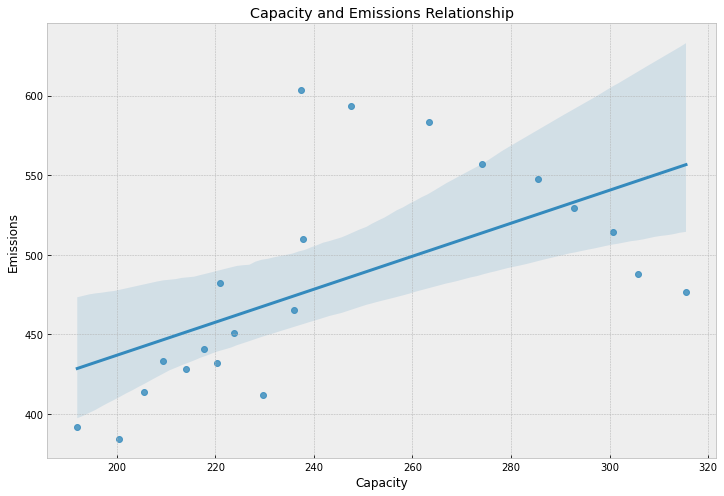

In [40]:
capacity = pd.DataFrame({'Capacity': total_capacity['Value']})

capacity.reset_index(drop=True, inplace=True)

capacity_emission = pd.concat([capacity, emission], axis=1)

plt.figure(figsize=(12, 8))
plt.title("Capacity and Emissions Relationship")

sns.regplot(x='Capacity', y='Emissions', data=capacity_emission)

plt.show()

### There is a positive relationship between capacity and emissions
 As demand increase capacity increase, and as the capacity increases, emissions increase.

-----

## Let's explore climate and energy demand together

In [41]:
energy_demand.head()

,Year,Category,Subcategory,Variable,Unit,Value
147735,2000,Electricity demand,Demand,Demand,TWh,988.40
147801,2001,Electricity demand,Demand,Demand,TWh,970.17
147867,2002,Electricity demand,Demand,Demand,TWh,986.56
147933,2003,Electricity demand,Demand,Demand,TWh,975.95
147999,2004,Electricity demand,Demand,Demand,TWh,1004.65


Combine climate and energy demand into one table

In [42]:
climate_demand = pd.merge(climate1, energy_demand, on='Year') #Demand = Aggregate Clean + Fossil Generation
climate_demand = climate_demand.filter(['Year','Average temperature',
                                       'Total precipitation', 
                                        'Sunlight hours', 
                                        'Total snowfall', 
                                        'Average humidity',
                                       'Value'])
climate_demand = climate_demand.rename(columns = {'Value': 'Electricity Demand (TWh)'})

climate_demand.head()

,Year,Average temperature,Total precipitation,Sunlight hours,Total snowfall,Average humidity,Electricity Demand (TWh)
0,2000,16.858333,1603.0,1962.5,0,59.500000,988.40
1,2001,16.491667,1491.0,1976.5,12,58.833333,970.17
2,2002,16.708333,1294.5,1990.0,3,58.916667,986.56
3,2003,16.008333,1854.0,1723.2,0,61.000000,975.95
4,2004,17.341667,1750.0,2132.7,3,58.166667,1004.65


In [43]:
climate_demand.corr(method="pearson")

,Year,Average temperature,Total precipitation,Sunlight hours,Total snowfall,Average humidity,Electricity Demand (TWh)
Year,1.000000,-0.188152,0.155135,0.189882,0.189639,0.844157,0.087313
Average temperature,-0.188152,1.000000,-0.077932,0.408599,0.079964,-0.287462,0.227022
Total precipitation,0.155135,-0.077932,1.000000,-0.436660,0.103934,0.182121,-0.204876
Sunlight hours,0.189882,0.408599,-0.436660,1.000000,0.275374,-0.023192,0.280943
Total snowfall,0.189639,0.079964,0.103934,0.275374,1.000000,0.064845,0.124699
Average humidity,0.844157,-0.287462,0.182121,-0.023192,0.064845,1.000000,-0.274711
Electricity Demand (TWh),0.087313,0.227022,-0.204876,0.280943,0.124699,-0.274711,1.000000


### Climate and Demand Correlation Matrix

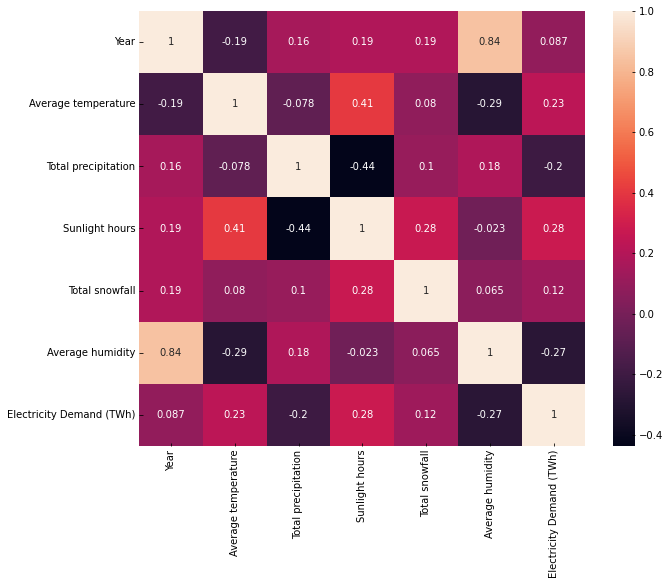

In [44]:
climate_demand_corr = climate_demand.corr(method="pearson")

plt.figure(figsize=(10, 8))
sns.heatmap(climate_demand_corr, annot=True)

plt.show()

### Sunlight hours and average temperature have the strongest correlation to energy demand
Let's explore more using scatter plots.

------

### Average Temperature and Electricity Demand

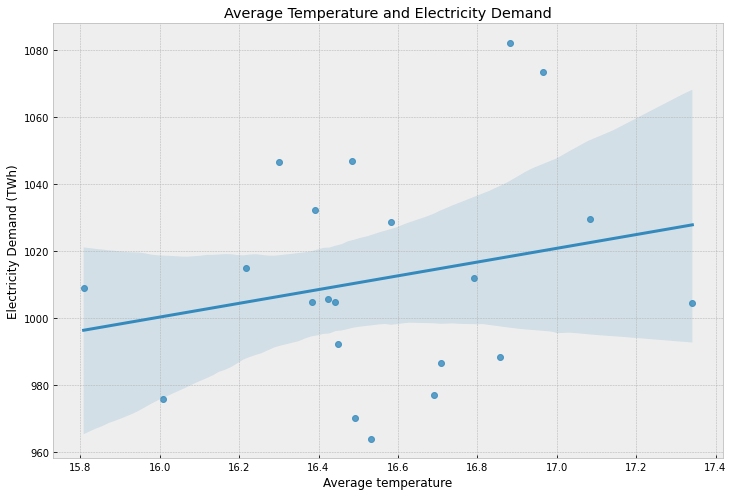

In [45]:
plt.figure(figsize=(12, 8))

plt.title("Average Temperature and Electricity Demand")
sns.regplot(x='Average temperature', y='Electricity Demand (TWh)', data=climate_demand)

plt.show()

### Higher average temperature tends to lead to higher demand
This should be due to the electricity usage for air conditioner especially in summer. As in winter Japan tends to rely on gas more than electricity for heat.

-----

### Total Precipitation and Electricity Demand

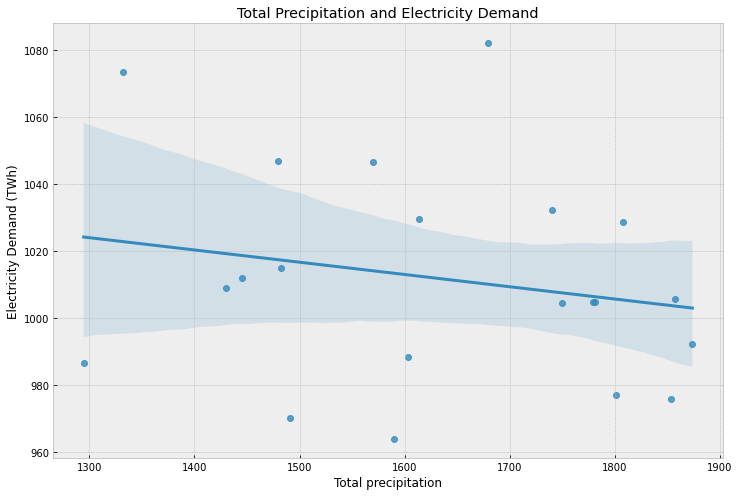

In [46]:
plt.figure(figsize=(12, 8))

plt.title("Total Precipitation and Electricity Demand")
sns.regplot(x='Total precipitation', y='Electricity Demand (TWh)', data=climate_demand)

plt.show()

### The amount of rain doesn't affect the electricity demand
------

### Total Snowfall and Electricity Demand

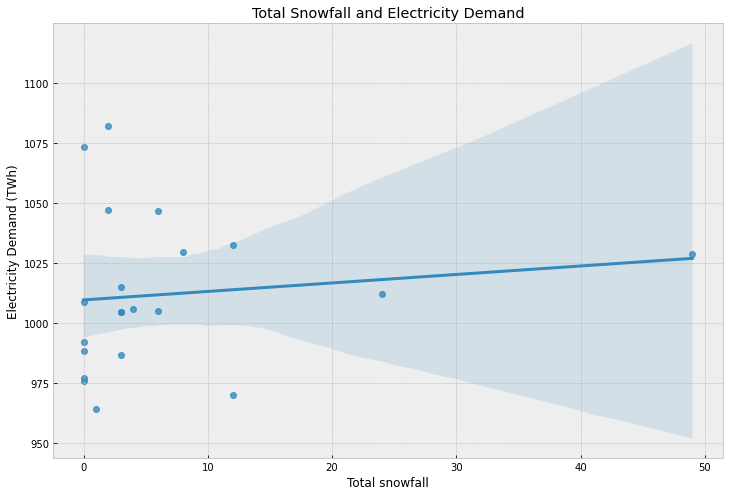

In [47]:
plt.figure(figsize=(12, 8))

plt.title("Total Snowfall and Electricity Demand")
sns.regplot(x='Total snowfall', y='Electricity Demand (TWh)', data=climate_demand)

plt.show()

### More snowfall might not have an affect on demand despite its positive relationship
The underlying factor here is cold weather or temperature. No matter it's snowing or not people will turn on heaters because it's cold.

-----

### Sunlight Hours and Electricity Demand

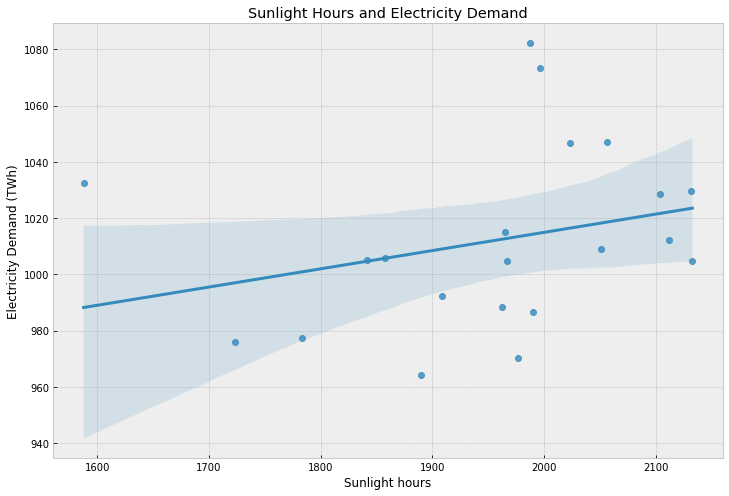

In [48]:
plt.figure(figsize=(12, 8))

plt.title("Sunlight Hours and Electricity Demand")
sns.regplot(x='Sunlight hours', y='Electricity Demand (TWh)', data=climate_demand)

plt.show()

### More sunlight hours tends to lead to more demand
It's likely due to hotness of the weather as people turning their air conditioners to cope.

------

### Average Humidity and Electricity Demand

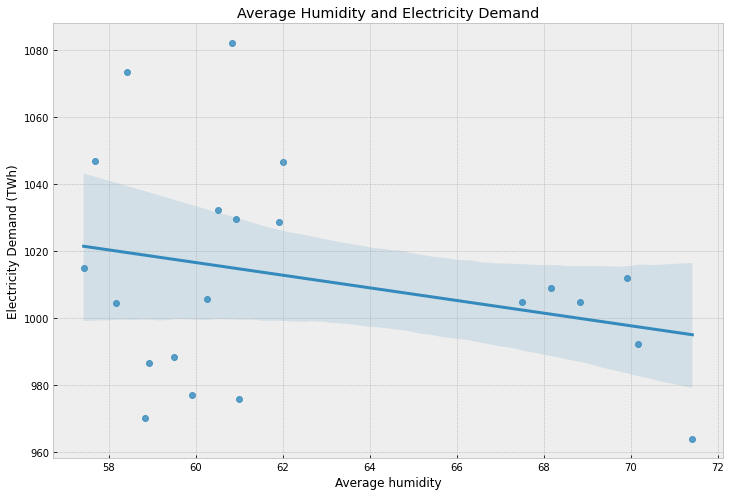

In [49]:
plt.figure(figsize=(12, 8))

plt.title("Average Humidity and Electricity Demand")
sns.regplot(x='Average humidity', y='Electricity Demand (TWh)', data=climate_demand)

plt.show()

### Humidity doesn't affect demand
There is nothing much that can be done to dealt with humidity, and humidity are not much of a hassle without hot weather.

------

# Summary

## By analyzing the two datasets, we've gained various insights:
__Climate:__
 * Since 2000, the temerature is more extreme (higher max, lower min).
 * Sunlight hours has never been lower than 1800 hours since 2008.
 * Humidity has increased quite a lot compared to 2000-2010
 * The changes are most likely due to global warming and climate change.
 
 
 __Energy:__
 * Gas and coal are the most use sources to generate power.
 * Nuclear power source has plummet since 2011 incident.
 * Coal and gas has increased since the incident, to accommodate power loss by nuclear power.
 * Solar power has been increasing since 2012.
 * Fossil energy generated emissions much more severe than clean energy.
 * Clean energy's emissions are almost non-existence compared to what it produced.
 * Japan has been increasing the capacity of both clean and fossil energy.
 * Demand does not change much from 2000 to 2020
 * More demand and capacity leads to more emissions as Japan are relying more on fossil energy.
 
 
 __Climate & Energy:__
* Higher temperature leads to more demand especially in summer.
* Lower temperature does not lead to more demand as people relying more on gas for heat.
* More sunlight hours leads to more demand.
* Demand increase are mostly due to heat.

## What are the problems found?

 * Climate change due to global warming.
 * Emissions from gas and coal, which is the majority.
 * Clean energy are minority of energy source.
 * More extreme temperature leads to more consumption during winter and especially during summer.
 
 
 __The main problem__ -> More extreme weather due to climate change leads to more consumption that accomodates by generating more electricity using mainly gas and coal which produce high amount of emissions. Then emissions lead to global warming which makes weather more extreme. It's basically a negative loop.
 
 
 
## What are the possible solutions?
 * A government national campaign to tackle climate change, not only informing people but also giving them direction of where and how to start making changes. 
 * Give incentives to food business reducing unnecessary plastics in products or change it entirely.
 * A mandatory environmental concern curriculum in schools.
 * Look into adopting more clean energy and try to find a way to justify the costs such as using technology while reducing coal and gas.
 * Look into restarting the nuclear power plants with extreme safety measures and plans.
 * Give incentives to people when buying EVs.
 * Construct more EV charging stations to persuade people to use EVs.
 * Try to transform transportation such as bus to EV.
 * Give commisions to electronics company that can pull off energy efficiency solutions of their products based on the criteria set.
 
These solutions may not solve all energy-related problems but will for sure help Japan get out of the negative loop and persuade other countries to do the same.  By being first and fast mover, Japan can also make national income from exporting energy efficiency solutions to starting countries which benefits the country, other countries, and the world in general. 
 
------